# Importing required Modules.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Loading CSV file.

In [2]:
aqi = pd.read_csv("AQI.csv")

In [3]:
aqi

,Date,Country,Status,AQI Value
0,21-07-2022,Albania,Good,14
1,21-07-2022,Algeria,Moderate,65
2,21-07-2022,Andorra,Moderate,55
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113
4,21-07-2022,Argentina,Moderate,63
...,...,...,...,...
17260,16-01-2025,United Kingdom of Great Britain and Northern I...,Unhealthy for Sensitive Groups,102
17261,16-01-2025,United States of America,Moderate,93
17262,16-01-2025,Uzbekistan,Unhealthy,170
17263,16-01-2025,Vatican,Good,25


# Analysing the data.

In [4]:
# Getting the basic information of the data.
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17265 entries, 0 to 17264
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       17265 non-null  object
 1   Country    17265 non-null  object
 2   Status     17265 non-null  object
 3   AQI Value  17265 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 539.7+ KB


In [5]:
# Getting the description of the data.
aqi.describe()

,AQI Value
count,17265.000000
mean,62.865566
std,49.617850
min,1.000000
25%,29.000000
50%,53.000000
75%,83.000000
max,963.000000


In [6]:
# Checking whether the datset contains any NaN values.
aqi.isna()

,Date,Country,Status,AQI Value
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
17260,False,False,False,False
17261,False,False,False,False
17262,False,False,False,False
17263,False,False,False,False


In [7]:
aqi.isnull().sum()

Date         0
Country      0
Status       0
AQI Value    0
dtype: int64

In [8]:
# Top 5 countries.
aqi.head()

,Date,Country,Status,AQI Value
0,21-07-2022,Albania,Good,14
1,21-07-2022,Algeria,Moderate,65
2,21-07-2022,Andorra,Moderate,55
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113
4,21-07-2022,Argentina,Moderate,63


In [9]:
# Bottom 5 countries.
aqi.tail()

,Date,Country,Status,AQI Value
17260,16-01-2025,United Kingdom of Great Britain and Northern I...,Unhealthy for Sensitive Groups,102
17261,16-01-2025,United States of America,Moderate,93
17262,16-01-2025,Uzbekistan,Unhealthy,170
17263,16-01-2025,Vatican,Good,25
17264,16-01-2025,Vietnam,Unhealthy for Sensitive Groups,131


In [10]:
# Create pivot table
pivot_table = pd.pivot_table(aqi, values=['AQI Value'], index= 'Country', aggfunc= 'mean')
pivot_table = pivot_table.reset_index()
pivot_table

,Country,AQI Value
0,Albania,26.661417
1,Algeria,59.837398
2,Andorra,29.204724
3,Angola,109.462366
4,Argentina,35.968504
...,...,...
137,Uzbekistan,72.112903
138,Vatican,46.440945
139,Venezuela,15.694215
140,Vietnam,85.992126


In [11]:
# Split the Date column into Year, Month and Day
aqi = pd.DataFrame(aqi)
aqi['Date'] = aqi['Date'].astype(str)
aqi[['Day', 'Month', 'Year']] = aqi['Date'].str.split('-', expand=True)

aqi['Day'] = aqi['Day'].astype(int)
aqi['Month'] = aqi['Month'].astype(int)
aqi['Year'] = aqi['Year'].astype(int)

aqi.drop(['Date'], axis=1)
print(aqi)

             Date                                            Country  \
0      21-07-2022                                            Albania   
1      21-07-2022                                            Algeria   
2      21-07-2022                                            Andorra   
3      21-07-2022                                             Angola   
4      21-07-2022                                          Argentina   
...           ...                                                ...   
17260  16-01-2025  United Kingdom of Great Britain and Northern I...   
17261  16-01-2025                           United States of America   
17262  16-01-2025                                         Uzbekistan   
17263  16-01-2025                                            Vatican   
17264  16-01-2025                                            Vietnam   

                               Status  AQI Value  Day  Month  Year  
0                                Good         14   21      7  2022

In [12]:
aqi

,Date,Country,Status,AQI Value,Day,Month,Year
0,21-07-2022,Albania,Good,14,21,7,2022
1,21-07-2022,Algeria,Moderate,65,21,7,2022
2,21-07-2022,Andorra,Moderate,55,21,7,2022
3,21-07-2022,Angola,Unhealthy for Sensitive Groups,113,21,7,2022
4,21-07-2022,Argentina,Moderate,63,21,7,2022
...,...,...,...,...,...,...,...
17260,16-01-2025,United Kingdom of Great Britain and Northern I...,Unhealthy for Sensitive Groups,102,16,1,2025
17261,16-01-2025,United States of America,Moderate,93,16,1,2025
17262,16-01-2025,Uzbekistan,Unhealthy,170,16,1,2025
17263,16-01-2025,Vatican,Good,25,16,1,2025


In [13]:
# Create a new pivot table
pivot_table = pd.pivot_table(aqi, values=['AQI Value', 'Year', 'Month', 'Day'], index= 'Country', aggfunc= 'mean')
pivot_table = pivot_table.reset_index()
pivot_table

,Country,AQI Value,Day,Month,Year
0,Albania,26.661417,16.023622,7.685039,2022.732283
1,Algeria,59.837398,15.902439,7.642276,2022.699187
2,Andorra,29.204724,16.023622,7.685039,2022.732283
3,Angola,109.462366,16.387097,7.494624,2022.236559
4,Argentina,35.968504,16.023622,7.685039,2022.732283
...,...,...,...,...,...
137,Uzbekistan,72.112903,16.000000,7.653226,2022.750000
138,Vatican,46.440945,16.023622,7.685039,2022.732283
139,Venezuela,15.694215,16.256198,7.727273,2022.702479
140,Vietnam,85.992126,16.023622,7.685039,2022.732283


In [14]:
# To remove the decimal points of Day, Month & Year 
df = pd.DataFrame(pivot_table)
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['AQI Value'] = df['AQI Value'].astype(int)
print(df)

        Country  AQI Value  Day  Month  Year
0       Albania         26   16      7  2022
1       Algeria         59   15      7  2022
2       Andorra         29   16      7  2022
3        Angola        109   16      7  2022
4     Argentina         35   16      7  2022
..          ...        ...  ...    ...   ...
137  Uzbekistan         72   16      7  2022
138     Vatican         46   16      7  2022
139   Venezuela         15   16      7  2022
140     Vietnam         85   16      7  2022
141      Zambia        117   16      7  2022

[142 rows x 5 columns]


# Data Visualization.

In [15]:
pivot_table = pd.pivot_table(df,values=['AQI Value', 'Day', 'Month', 'Year'], index= 'Country', aggfunc= 'mean')
pivot_table = pivot_table.reset_index()
pivot_table

,Country,AQI Value,Day,Month,Year
0,Albania,26.0,16.0,7.0,2022.0
1,Algeria,59.0,15.0,7.0,2022.0
2,Andorra,29.0,16.0,7.0,2022.0
3,Angola,109.0,16.0,7.0,2022.0
4,Argentina,35.0,16.0,7.0,2022.0
...,...,...,...,...,...
137,Uzbekistan,72.0,16.0,7.0,2022.0
138,Vatican,46.0,16.0,7.0,2022.0
139,Venezuela,15.0,16.0,7.0,2022.0
140,Vietnam,85.0,16.0,7.0,2022.0


In [16]:
# Filter data for countries starting with 'A' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('A')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])


,Year,Country,AQI Value
0,2022,Albania,14
142,2022,Albania,17
284,2022,Albania,15
425,2022,Albania,15
566,2022,Albania,20
...,...,...,...
17027,2025,Austria,61
17149,2025,Austria,69
16904,2025,Azerbaijan,46
17028,2025,Azerbaijan,77


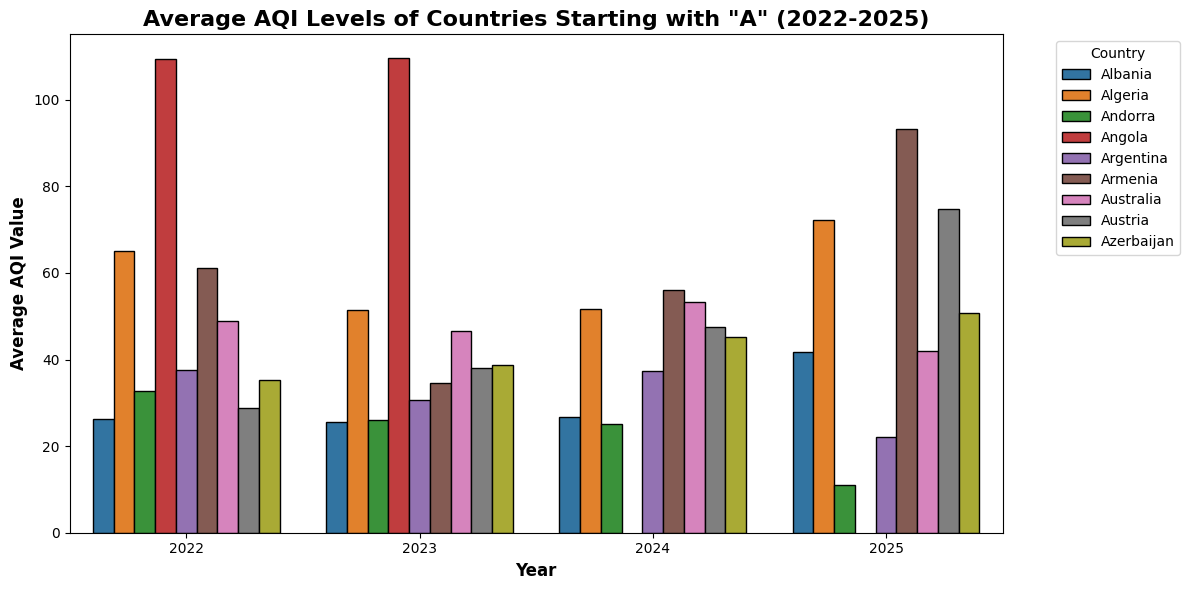

In [17]:
# Aggregate the average AQI values for countries starting with 'A' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "A" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
# Filter data for countries starting with 'B' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('B')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
9,2022,Bahrain,165
151,2022,Bahrain,161
293,2022,Bahrain,154
434,2022,Bahrain,153
575,2022,Bahrain,162
...,...,...,...
16912,2025,Bulgaria,105
17035,2025,Bulgaria,94
17158,2025,Bulgaria,98
17036,2025,Burkina Faso,151


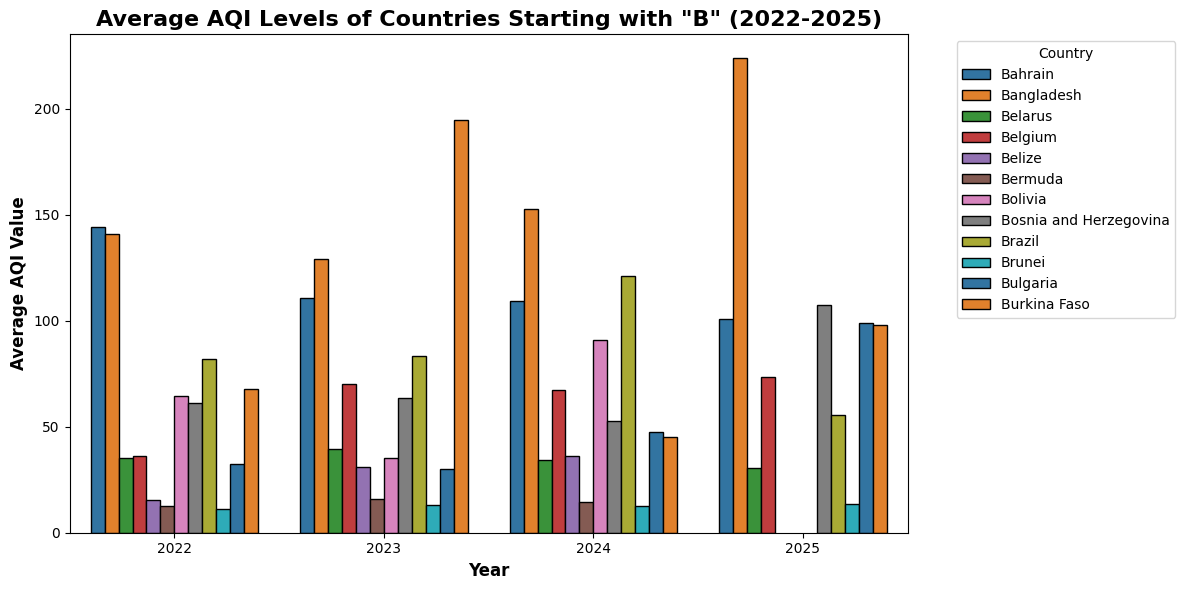

In [19]:
# Aggregate the average AQI values for countries starting with 'B' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "B" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [20]:
# Filter data for countries starting with 'C' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('C')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
21,2022,Cambodia,15
163,2022,Cambodia,15
305,2022,Cambodia,15
446,2022,Cambodia,15
587,2022,Cambodia,15
...,...,...,...
17046,2025,Cyprus,102
17169,2025,Cyprus,51
16923,2025,Czech Republic,91
17047,2025,Czech Republic,48


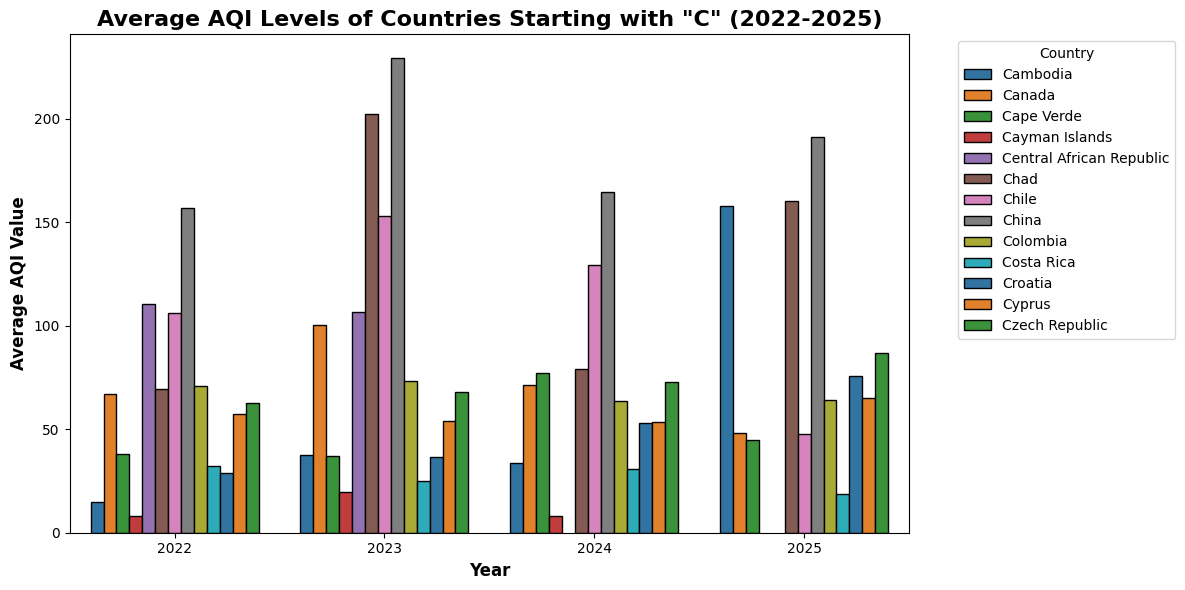

In [21]:
# Aggregate the average AQI values for countries starting with 'C' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "C" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [22]:
# Filter data for countries starting with 'D' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('D')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
34,2022,Denmark,36
176,2022,Denmark,36
318,2022,Denmark,24
459,2022,Denmark,17
600,2022,Denmark,16
...,...,...,...
17048,2025,Denmark,19
17171,2025,Denmark,16
16925,2025,Dominican Republic,8
17049,2025,Dominican Republic,25


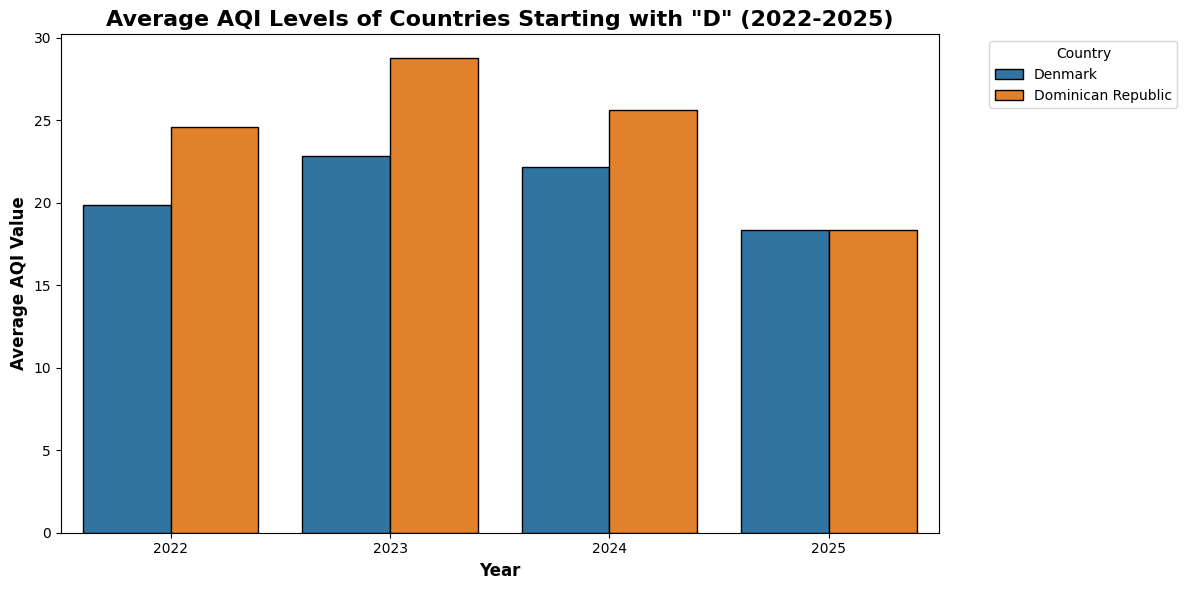

In [23]:
# Aggregate the average AQI values for countries starting with 'D' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "D" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# Filter data for countries starting with 'E' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('E')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
36,2022,Ecuador,54
178,2022,Ecuador,58
320,2022,Ecuador,48
461,2022,Ecuador,68
602,2022,Ecuador,53
...,...,...,...
17052,2025,Estonia,21
17175,2025,Estonia,23
16929,2025,Ethiopia,55
17053,2025,Ethiopia,61


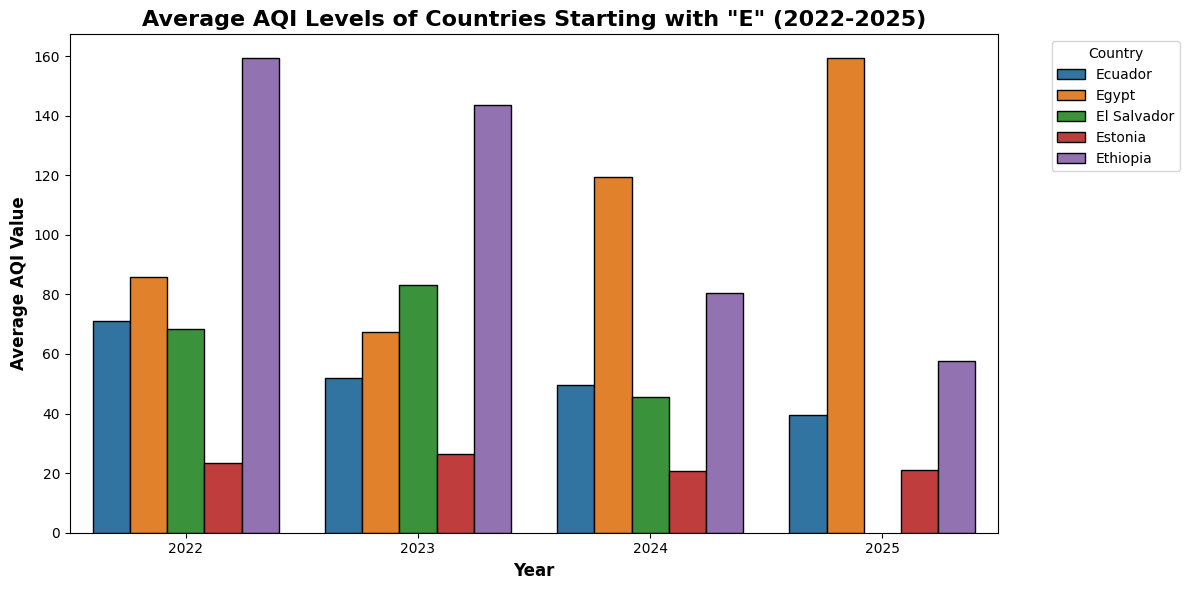

In [25]:
# Aggregate the average AQI values for countries starting with 'E' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "E" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [26]:
# Filter data for countries starting with 'F' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('F')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
41,2022,Finland,25
183,2022,Finland,25
325,2022,Finland,40
466,2022,Finland,47
607,2022,Finland,61
...,...,...,...
17055,2025,France,74
17178,2025,France,149
16932,2025,French Guiana,36
17056,2025,French Guiana,40


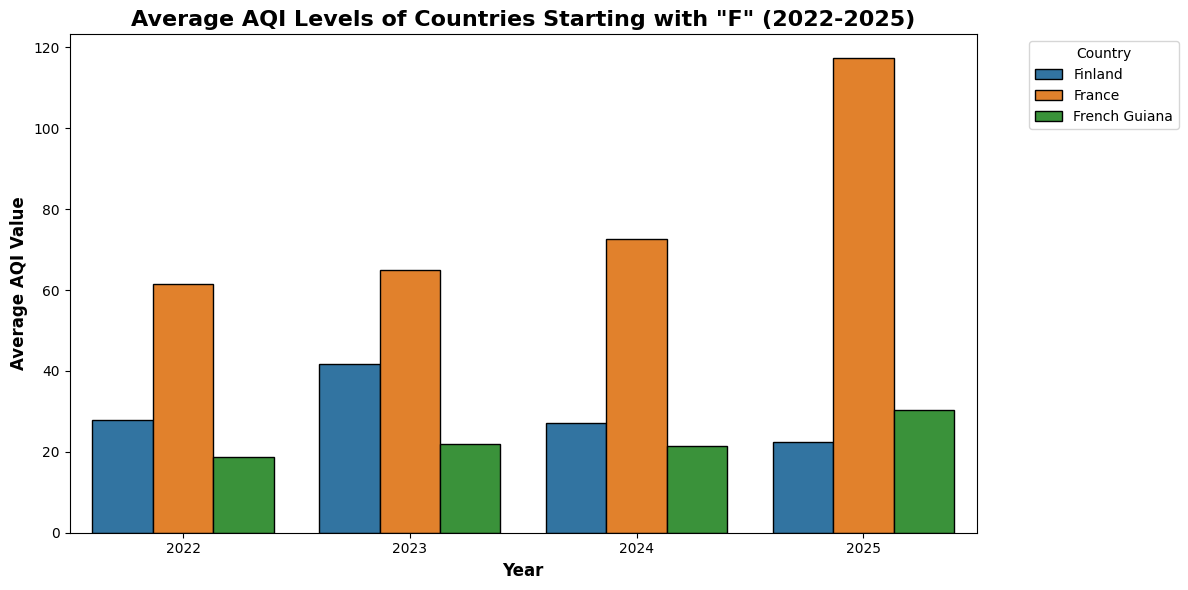

In [27]:
# Aggregate the average AQI values for countries starting with 'F' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "F" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [28]:
# Filter data for countries starting with 'G' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('G')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
44,2022,Gabon,118
186,2022,Gabon,129
328,2022,Gabon,102
469,2022,Gabon,123
610,2022,Gabon,152
...,...,...,...
17062,2025,Guadeloupe,28
17185,2025,Guadeloupe,20
16939,2025,Guatemala,53
17063,2025,Guatemala,25


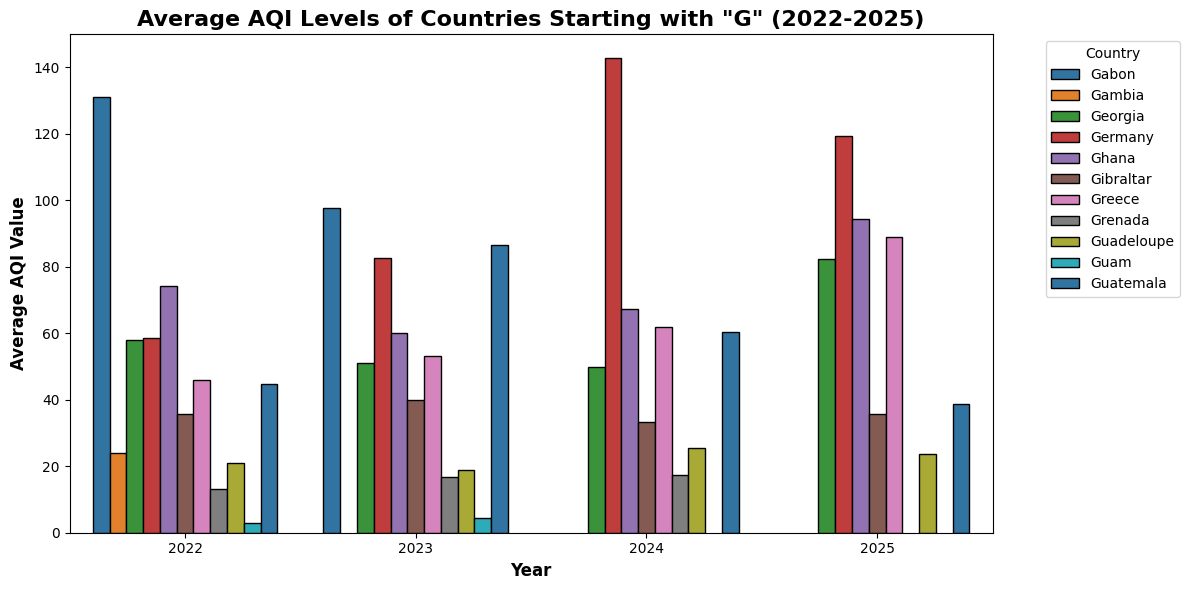

In [29]:
# Aggregate the average AQI values for countries starting with 'G' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "G" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# Filter data for countries starting with 'H' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('H')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
55,2022,Honduras,47
197,2022,Honduras,68
339,2022,Honduras,14
480,2022,Honduras,30
621,2022,Honduras,13
...,...,...,...
17064,2025,Hong Kong,107
17187,2025,Hong Kong,115
16941,2025,Hungary,94
17065,2025,Hungary,84


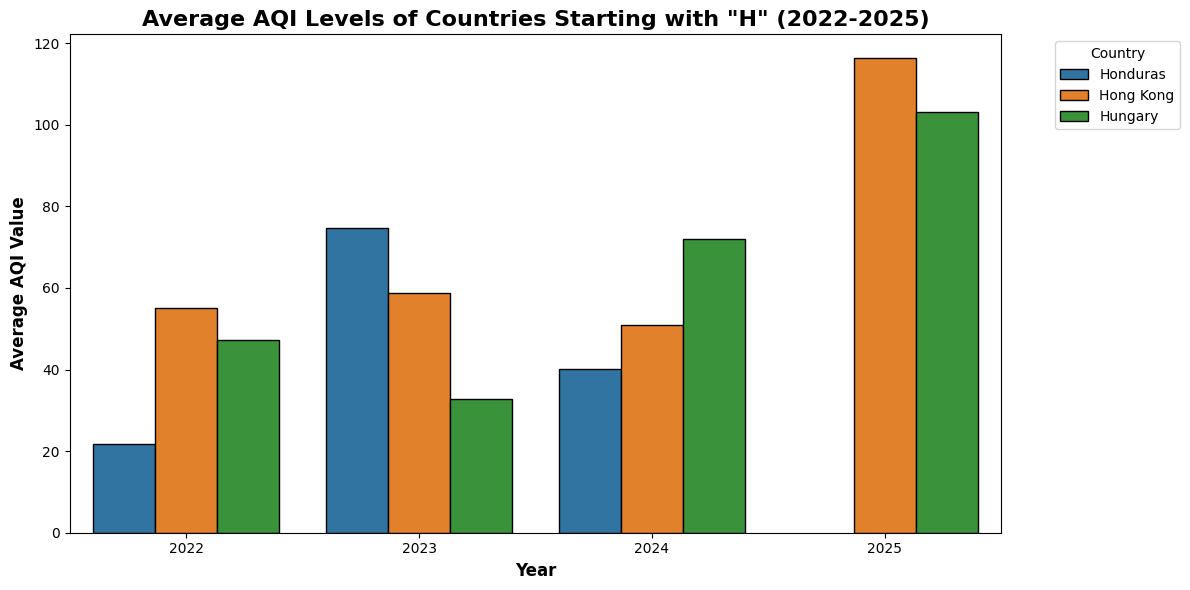

In [31]:
# Aggregate the average AQI values for countries starting with 'H' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "H" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
# Filter data for countries starting with 'I' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('I')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
58,2022,Iceland,8
200,2022,Iceland,9
342,2022,Iceland,15
483,2022,Iceland,12
624,2022,Iceland,10
...,...,...,...
17073,2025,Italy,105
17196,2025,Italy,98
16950,2025,Ivory Coast,65
17074,2025,Ivory Coast,65


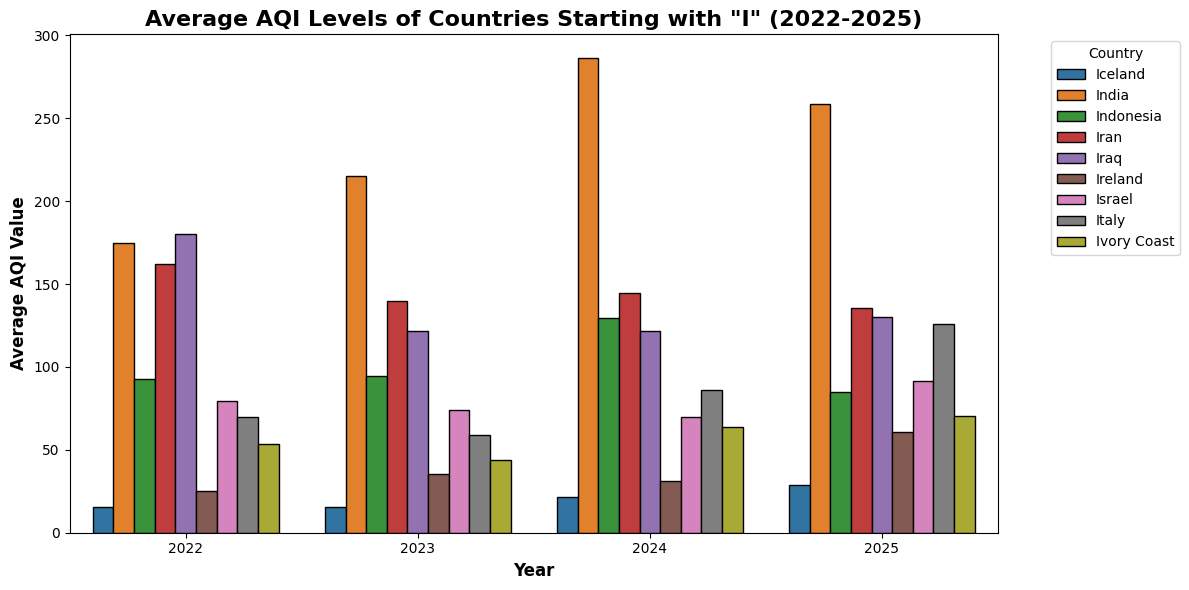

In [33]:
# Aggregate the average AQI values for countries starting with 'I' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "I" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [34]:
# Filter data for countries starting with 'J' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('J')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
67,2022,Japan,110
209,2022,Japan,89
351,2022,Japan,68
492,2022,Japan,94
633,2022,Japan,68
...,...,...,...
17076,2025,Jersey,13
17199,2025,Jersey,1
16953,2025,Jordan,37
17077,2025,Jordan,27


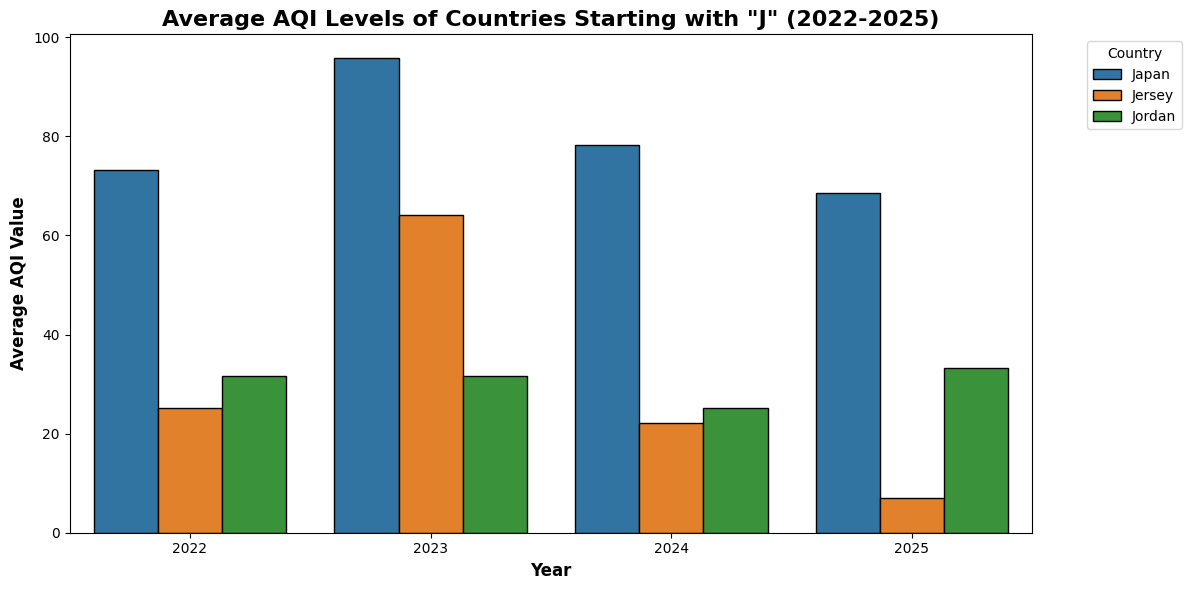

In [35]:
# Aggregate the average AQI values for countries starting with 'J' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "J" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Filter data for countries starting with 'K' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('K')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
70,2022,Kazakhstan,62
212,2022,Kazakhstan,60
354,2022,Kazakhstan,71
495,2022,Kazakhstan,62
636,2022,Kazakhstan,86
...,...,...,...
17081,2025,Kuwait,73
17204,2025,Kuwait,125
16958,2025,Kyrgyzstan,48
17082,2025,Kyrgyzstan,17


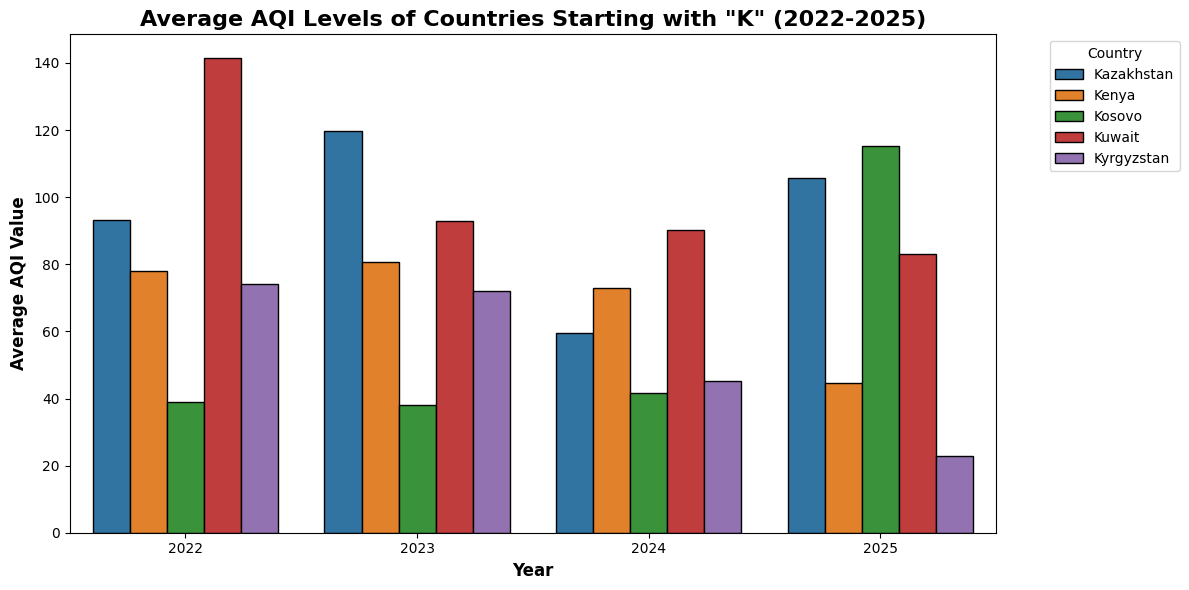

In [37]:
# Aggregate the average AQI values for countries starting with 'K' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "K" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
# Filter data for countries starting with 'L' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('L')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
75,2022,Laos,20
217,2022,Laos,30
359,2022,Laos,65
500,2022,Laos,12
641,2022,Laos,45
...,...,...,...
17087,2025,Lithuania,19
17209,2025,Lithuania,17
16965,2025,Luxembourg,24
17088,2025,Luxembourg,27


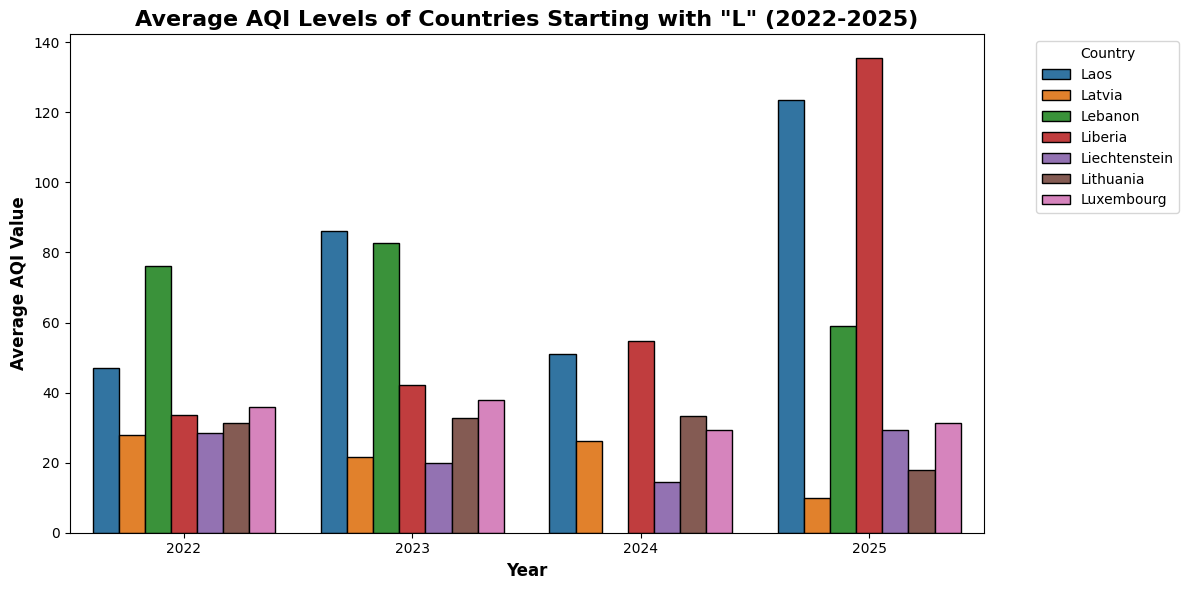

In [39]:
# Aggregate the average AQI values for countries starting with 'L' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "L" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [40]:
# Filter data for countries starting with 'M' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('M')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
82,2022,Macao,30
224,2022,Macao,38
366,2022,Macao,26
507,2022,Macao,59
648,2022,Macao,50
...,...,...,...
17099,2025,Montenegro,89
17221,2025,Montenegro,50
16977,2025,Myanmar,128
17100,2025,Myanmar,123


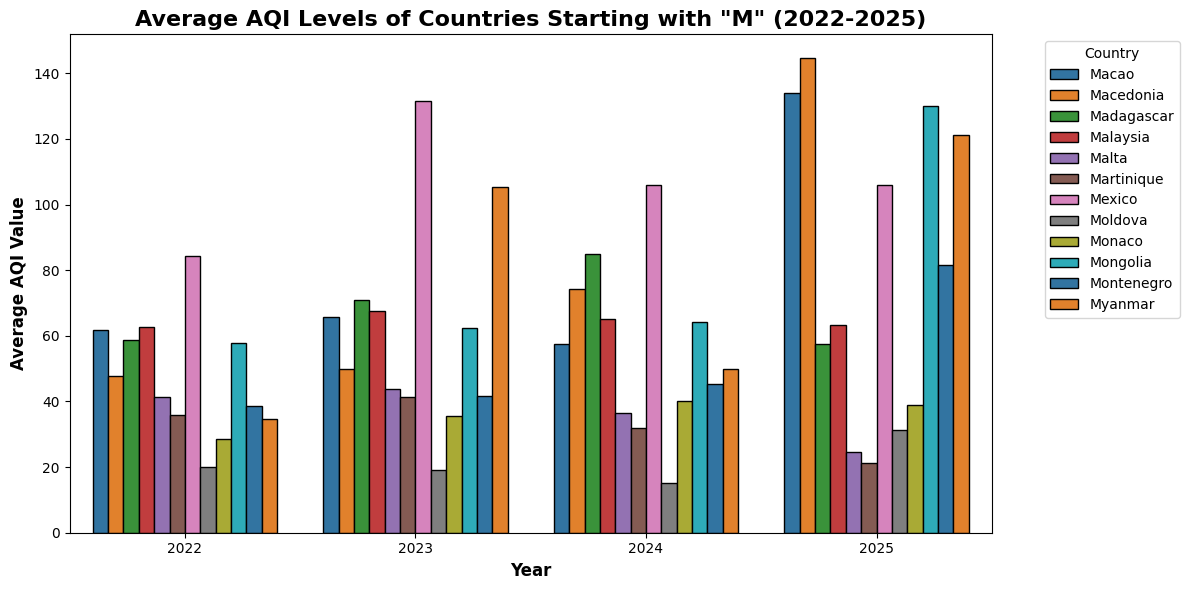

In [41]:
# Aggregate the average AQI values for countries starting with 'M' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "M" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
# Filter data for countries starting with 'N' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('N')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
94,2022,Nepal,81
236,2022,Nepal,79
378,2022,Nepal,58
519,2022,Nepal,48
660,2022,Nepal,26
...,...,...,...
17105,2025,Nigeria,135
17227,2025,Nigeria,162
16983,2025,Norway,13
17106,2025,Norway,42


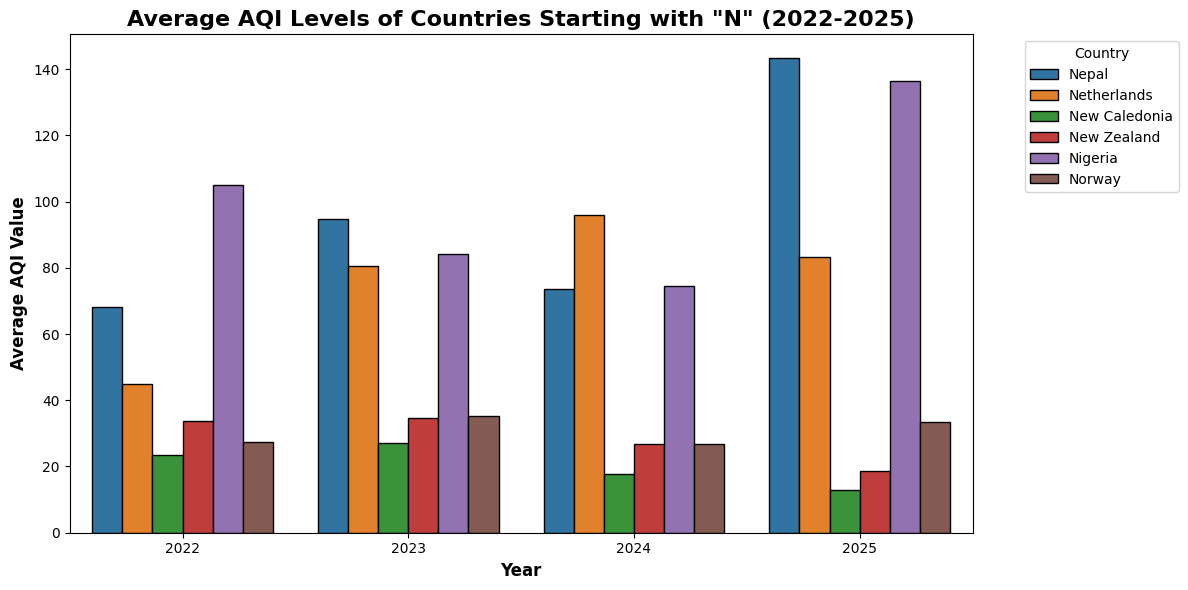

In [43]:
# Aggregate the average AQI values for countries starting with 'N' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "N" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# Filter data for countries starting with 'P' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('P')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
100,2022,Pakistan,91
242,2022,Pakistan,91
384,2022,Pakistan,91
525,2022,Pakistan,91
666,2022,Pakistan,91
...,...,...,...
17111,2025,Poland,108
17233,2025,Poland,116
16989,2025,Portugal,39
17112,2025,Portugal,32


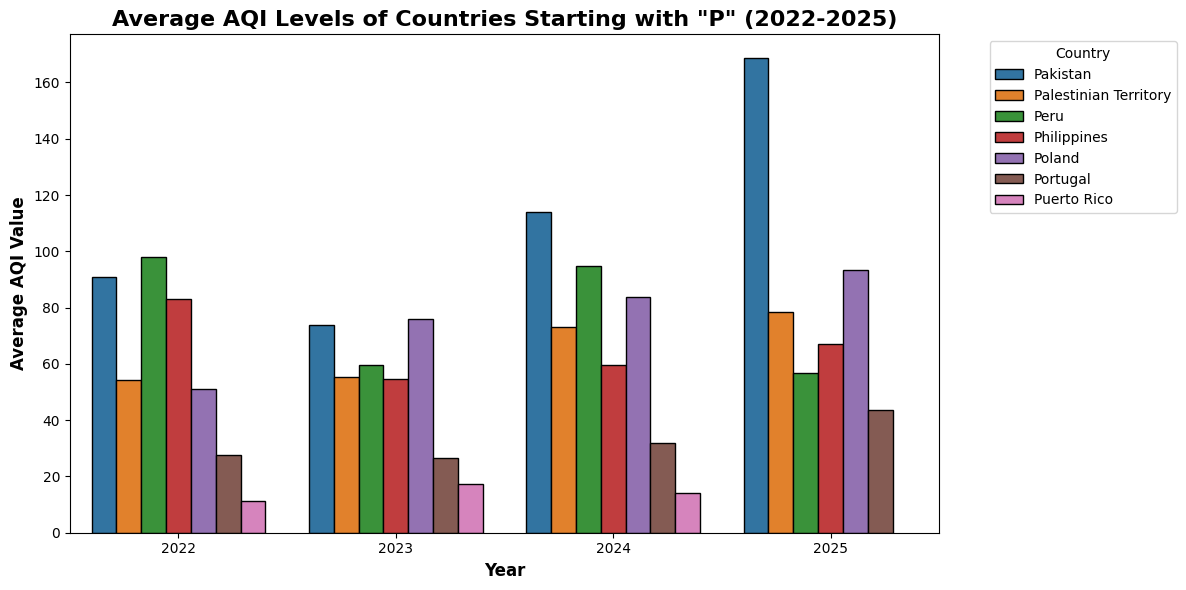

In [45]:
# Aggregate the average AQI values for countries starting with 'P' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "P" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
# Filter data for countries starting with 'Q' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('Q')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
107,2022,Qatar,183
249,2022,Qatar,183
391,2022,Qatar,183
532,2022,Qatar,183
673,2022,Qatar,183
...,...,...,...
12422,2023,Qatar,74
12555,2023,Qatar,76
12688,2023,Qatar,46
12821,2023,Qatar,60


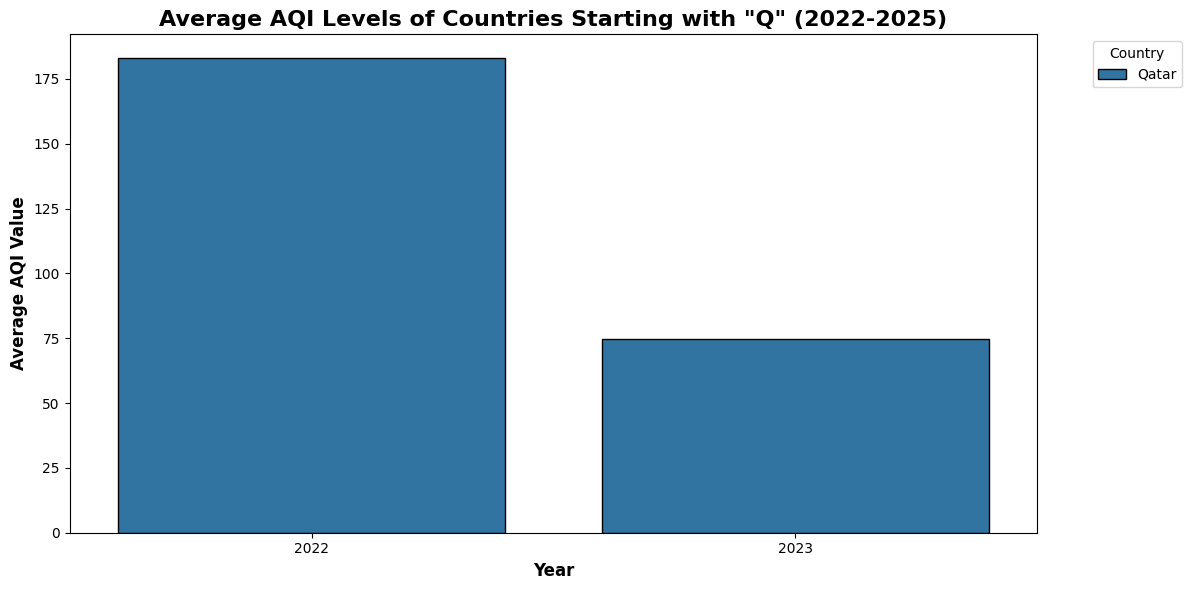

In [47]:
# Aggregate the average AQI values for countries starting with 'Q' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "Q" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [48]:
# Filter data for countries starting with 'R' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('R')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
108,2022,Reunion,14
250,2022,Reunion,24
392,2022,Reunion,23
533,2022,Reunion,25
674,2022,Reunion,22
...,...,...,...
17114,2025,Romania,128
17236,2025,Romania,97
16992,2025,Russia,52
17115,2025,Russia,89


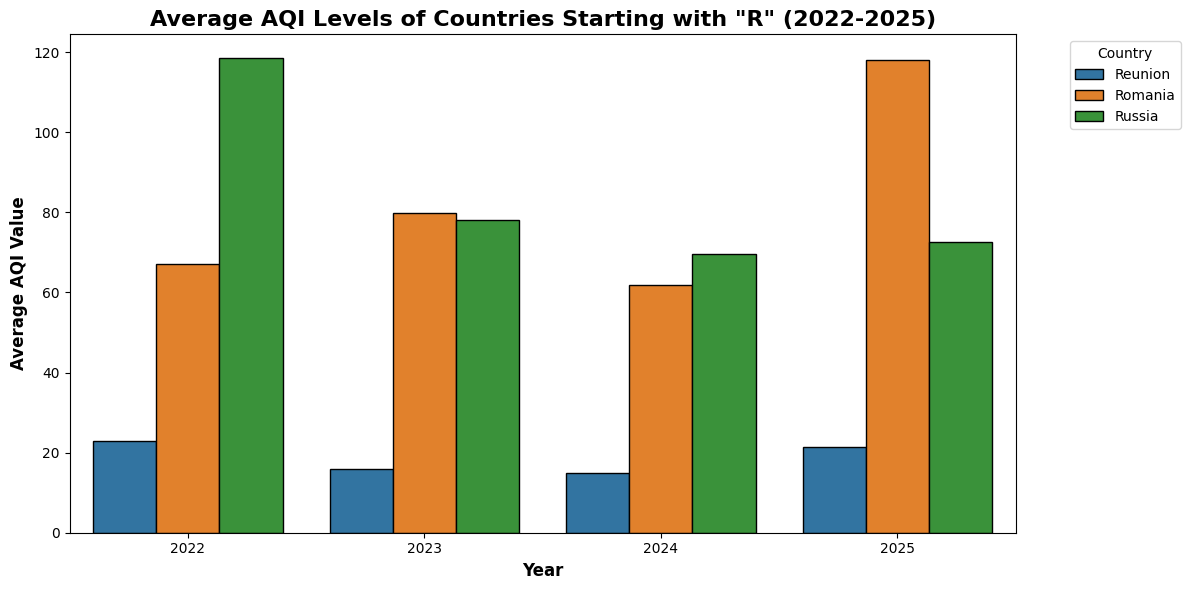

In [49]:
# Aggregate the average AQI values for countries starting with 'R' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "R" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [50]:
# Filter data for countries starting with 'S' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('S')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
111,2022,San Marino,50
253,2022,San Marino,50
395,2022,San Marino,56
536,2022,San Marino,56
677,2022,San Marino,57
...,...,...,...
17126,2025,Sweden,17
17248,2025,Sweden,35
17004,2025,Switzerland,55
17127,2025,Switzerland,29


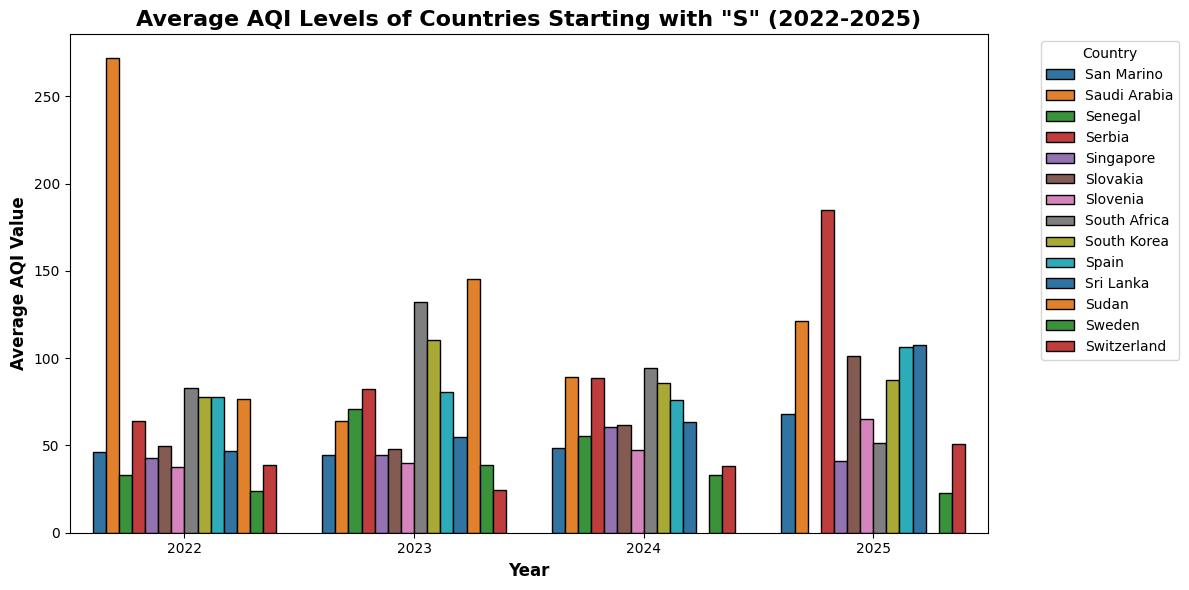

In [51]:
# Aggregate the average AQI values for countries starting with 'S' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "S" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [52]:
# Filter data for countries starting with 'T' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('T')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
125,2022,Taiwan,59
267,2022,Taiwan,63
408,2022,Taiwan,58
549,2022,Taiwan,72
690,2022,Taiwan,65
...,...,...,...
17133,2025,Turkey,185
17255,2025,Turkey,163
17011,2025,Turkmenistan,38
17134,2025,Turkmenistan,74


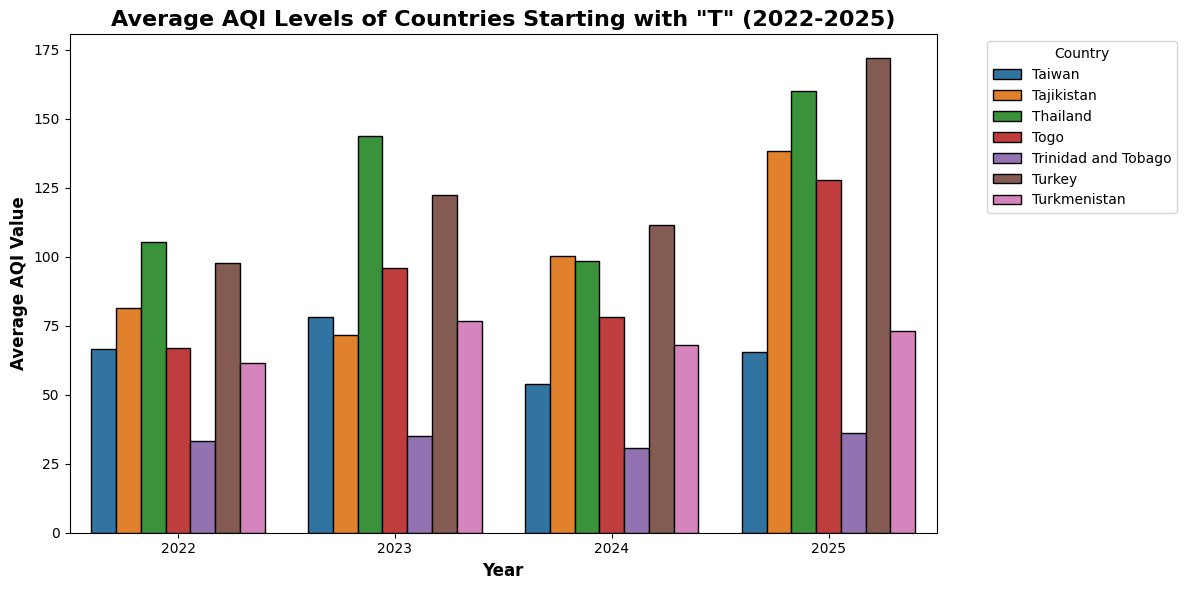

In [53]:
# Aggregate the average AQI values for countries starting with 'T' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "T" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
# Filter data for countries starting with 'U' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('U')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
132,2022,Uganda,198
274,2022,Uganda,189
415,2022,Uganda,161
556,2022,Uganda,163
697,2022,Uganda,165
...,...,...,...
17139,2025,United States of America,144
17261,2025,United States of America,93
17017,2025,Uzbekistan,90
17140,2025,Uzbekistan,161


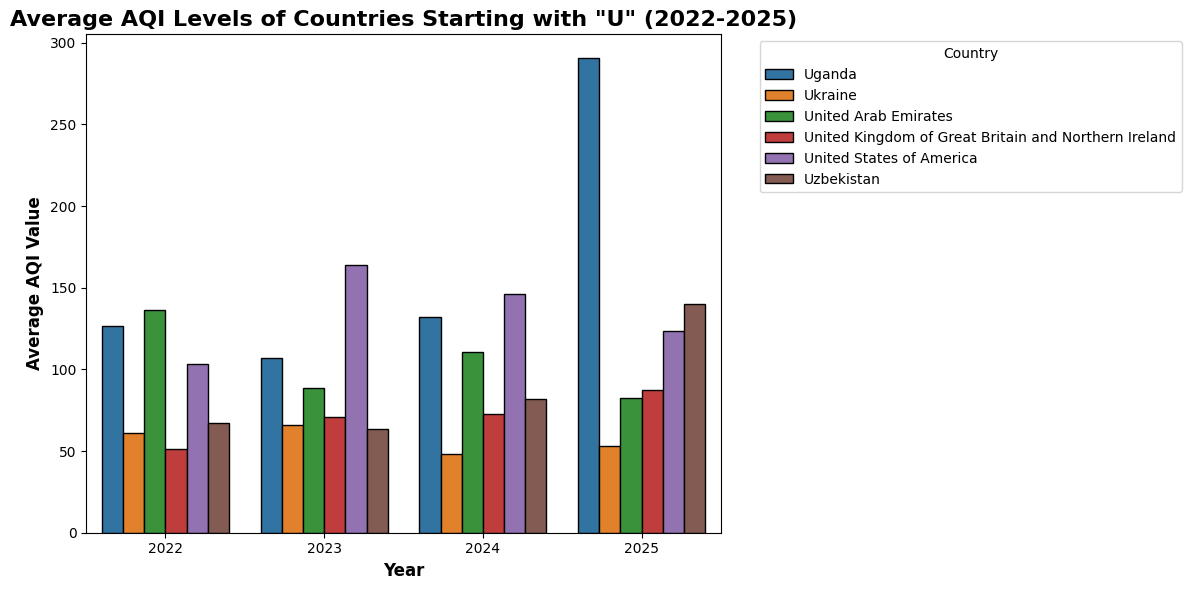

In [55]:
# Aggregate the average AQI values for countries starting with 'U' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "U" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [56]:
# Filter data for countries starting with 'V' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('V')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
138,2022,Vatican,70
280,2022,Vatican,70
421,2022,Vatican,61
562,2022,Vatican,61
703,2022,Vatican,68
...,...,...,...
17263,2025,Vatican,25
17019,2025,Venezuela,3
17020,2025,Vietnam,78
17142,2025,Vietnam,128


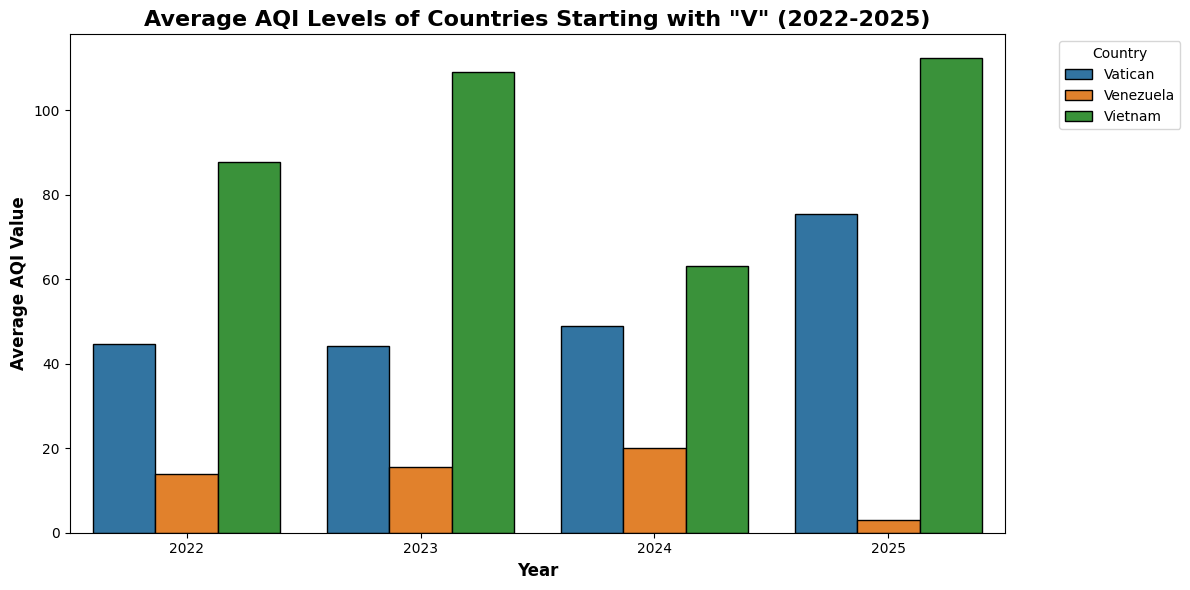

In [57]:
# Aggregate the average AQI values for countries starting with 'V' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "V" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
# Filter data for countries starting with 'Z' and for years 2022-2025
filtered_aqi = aqi[
    (aqi['Country'].str.startswith('Z')) & (aqi['Year'].isin([2022, 2023, 2024, 2025]))
]

# Select relevant columns for display
filtered_aqi_result = filtered_aqi[['Year', 'Country', 'AQI Value']]

# Display the filtered results
filtered_aqi_result.sort_values(by=['Year', 'Country'])

,Year,Country,AQI Value
141,2022,Zambia,39
283,2022,Zambia,54
424,2022,Zambia,36
565,2022,Zambia,66
706,2022,Zambia,100
...,...,...,...
14552,2024,Zambia,174
14681,2024,Zambia,129
14809,2024,Zambia,153
15194,2024,Zambia,170


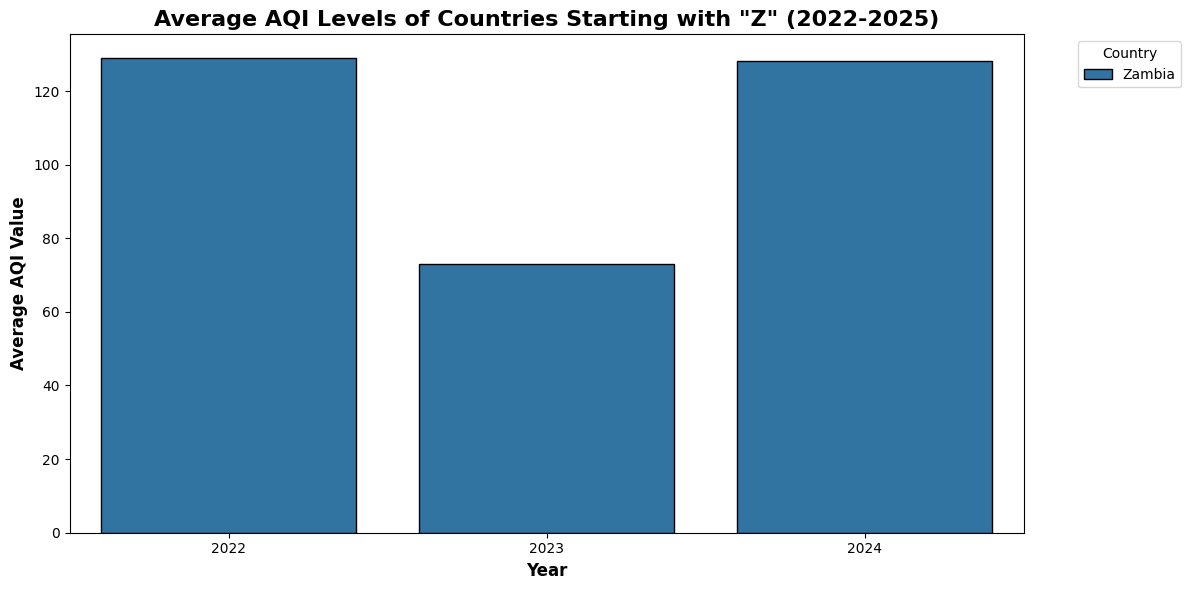

In [59]:
# Aggregate the average AQI values for countries starting with 'Z' by year and country
aggregated_aqi = filtered_aqi.groupby(['Year', 'Country'])['AQI Value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=aggregated_aqi, 
    x='Year', 
    y='AQI Value', 
    hue='Country', 
    palette='tab10',
    edgecolor='black'
)
plt.title('Average AQI Levels of Countries Starting with "Z" (2022-2025)', fontsize=16,fontweight='bold')
plt.xlabel('Year', fontsize=12,fontweight='bold')
plt.ylabel('Average AQI Value', fontsize=12,fontweight='bold')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

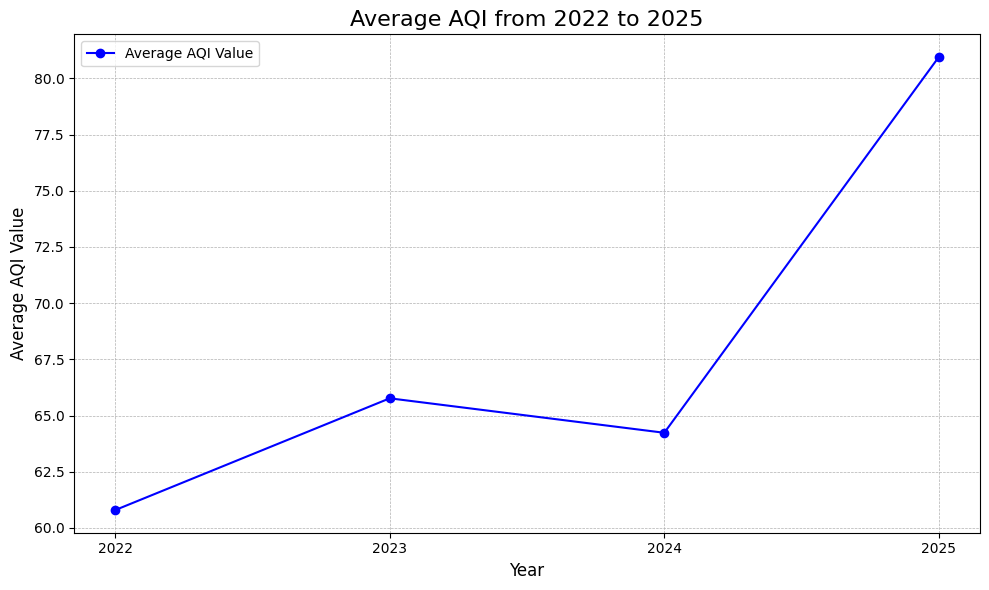

In [60]:
# Group by year and calculate the average AQI Value
aqi['Date'] = pd.to_datetime(aqi['Date'], format='%d-%m-%Y')
aqi['Year'] = aqi['Date'].dt.year
yearly_aqi = aqi.groupby('Year')['AQI Value'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_aqi.index, yearly_aqi.values, marker='o', linestyle='-', color='b', label='Average AQI Value')
plt.title('Average AQI from 2022 to 2025', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average AQI Value', fontsize=12)
plt.xticks(yearly_aqi.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


In [61]:
# If the user want to know about the random country
def get_AQI_value(country_name):
    country_data = aqi[aqi['Country'] == country_name]
    if not country_data.empty:
        return country_data['AQI Value'].values[0]
    else: return f"AQI Value for {country_name} not found."
country_name = input("Enter the name of the Country to know its AQI Value: ")
AQI_value = get_AQI_value(country_name)
print(f"The AQI Value of {country_name} is: {AQI_value}")

The AQI Value of India is: 162


In [62]:
fig = px.choropleth(aqi, locations= 'Country',
                    locationmode='country names',
                    color="AQI Value",
                    hover_name="Country",
                    title="Country as per thier AQI Value",
                    color_continuous_scale="tealgrn",)
fig.show()

In [63]:
# To know the AQI Value of countries as per Year
print("You can only know the AQI value for the following years because the Dataset contains only the following years:\n1. 2022\n2. 2023\n3. 2024\n4. 2025")
input_country = input("Enter the country name: ")
input_year = int(input("Enter the year: "))

filtered_data = aqi[(aqi['Country'] == input_country) & (aqi['Year'] == input_year)]

if not filtered_data.empty:
    print(f"The AQI Value for {input_country} in {input_year} is {filtered_data['AQI Value'].values[0]}")
else:
    print(f"No data available for {input_country} in {input_year}.")

You can only know the AQI value for the following years because the Dataset contains only the following years:
1. 2022
2. 2023
3. 2024
4. 2025
The AQI Value for India in 2024 is 496
